In [22]:
import jieba
import jieba.analyse
import re
import pandas as pd
import urllib.parse as ur
import os 
import numpy as np
#os.getcwd()
df = pd.DataFrame(pd.read_csv('/Users/kuoloading/Downloads/news.csv'))
index = pd.DataFrame(pd.read_csv('/Users/kuoloading/Downloads/label_2018_stock.csv'))
data = pd.DataFrame(pd.read_csv('/Users/kuoloading/Downloads/ver2.csv'))
print(df.columns)

Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url'],
      dtype='object')


In [23]:
#--------------------------------
# 存停用詞, 分詞, 過濾後分詞的list
#--------------------------------
stopWords=[]
#--------------------------------
# 讀入停用詞檔
#--------------------------------
with open('/Users/kuoloading/Docum/大三下/stopwords.txt', 'r', encoding='UTF-8') as file:
    for data1 in file.readlines():
        data1 = data1.strip()
        stopWords.append(data1)

In [24]:
text_all = []
label_all = []
text_down = ''
#sent_down = []
texts = []

for i in data['content']:
    text_down = i
    text_down = re.sub(r'[^\w]','',text_down)
    text_down = re.sub(r'[A-Za-z0-9]','',text_down)
    temp_down = ''
    segments_down=[]
    remainderWords_down=[]
    segments_down = jieba.cut(text_down, cut_all=False)
    remainderWords_down = list(filter(lambda a: a not in stopWords and a != '\n', segments_down))
    cnt = 0
    for k in remainderWords_down:
        if (cnt == 0) or (cnt == len(remainderWords_down)):
            temp_down += (k)
        else:
            temp_down += ' '
            temp_down += k
        cnt += 1
    texts.append(temp_down)

In [25]:
texts

['台股 開紅盤 法人 壓寶股 衝新目 標小英 解決 低薪 問題 跨年 商機 猛小天 賣 出萬杯 咖啡 元旦 開跑 雨 遮 屋簷 不計坪 不計價 預售 屋開 價恐 灌水 行動 支付 經部箭 衝市 占 勞基法成 立院 臨時會 第一 棒 鋼鐵 今年 景氣 老樂觀 鋼鐵業 年 終 讚 林 明 儒 豐 興 月 起跳 權證 交易量 突進 今年 拚破兆經濟 復 甦 無感 伊朗 總統 遇政權 危機安撫 示威者 政府 合作 梅克爾承諾 打破 僵局 加快 組 新政府 反聖 嬰恐 現黃小玉 價格 蠢動 大陸 封殺 虛擬 貨幣 交易所 轉戰 日本 陸客 投資 比特 幣借 道 香港 門年 股行情 報告 藍籌股 轉衰 上半年 慢牛 可期 利率 低盪 企業 發債 上半年 良機 債市 開紅盤 估年券 利率 續 探底 電信 突破 開放 網路 合建 共用 台灣 前段 班 預計 首波 釋照 陸記憶體 布局 三大陣營 成形 半導體 缺貨漲 價勝 一榮化 進補 今年 鋁箔 基板 材料 供需 吃 緊九豪 陶瓷 基板 看漲 達 運中 光電 轉型 獲利 拚 提升 亞馬遜 熱銷 聯發科 新 唐出 貨續 強帶 頭漲 達 邁律勝 股價 飆瑞 儀友 達 攻陸 智慧 機市場 打頭陣 歐買尬 營運樂觀 工具 機 族群 上半年 訂單 滿手 高鋒處 分廠 房 利益 認列 食品 股 漂亮 封關 聯華統 一業 外 吃 補後市 俏慧智 基因 競拍 每股 底價元 雷虎 生技 拚 櫃資本 支出 增油價 原料 漲台 橡中 橡 得利 攬 貨業 獲利力 拚 加碼 貨櫃 雙雄 開春迎 彩頭宏森 搶食 尾牙 新春 商機 東南 水泥 重畫區 帳面 價倍數 翻揚供 應求 大中 尼克森 富鼎 醞釀 漲價',
 '盤勢 分析 因道瓊 指數續 創 新高 加上 新台幣 持續 勁揚 帶動台 股上 週五延續 前日 漲勢 跳空 開高 台積 電聯 發科旺宏 半導體 股 領漲 台塑 集團 傳產 股續 有表現 開盤 不久 順利越 過點關 卡其 維持 高檔 震盪 走勢 午後大盤 一度 感受 調節 壓力 出現 壓回 最後一盤 台積 電鴻海 權值 股 擺尾收 當日 相對 高點 挹注 下大盤 終場 漲點 以點 作收 成交 值為 億元 台股 週線 漲點 月 線 漲點 年線 漲點 大類 股漲 跌少 當中以 電器 電纜 塑膠 半導 體類 股表現 較佳 反觀 玻陶類 股因 前日 大漲 

In [26]:
train_texts = []
for i in range(len(texts)):
    train_texts += [texts[i]]


In [27]:
train_labels = []
for i in range(len(data)):
    train_labels += [data['class'][i]]
    
    

In [28]:
print(len(texts))
print(len(data))

2378
2378


In [29]:
X =  np.array(train_texts)
y =  np.array(train_labels)

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
#X,y=np.arange(10).reshape((5,2)),range
#X=np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])
#y=[0,1,2,3,4]
#print(X)
#print(y)
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=101)
print(len(train_texts))
print(len(test_texts))
print(len(train_labels))
print(len(test_labels))

1902
476
1902
476


In [31]:
#coding:utf-8
import sys
import importlib
importlib.reload(sys)
from sklearn.metrics import confusion_matrix
#reload(sys)
#sys.setdefaultencoding('utf8')

VECTOR_DIR = 'vectors.bin'

all_text = train_texts 
print ('(1) doc to var...')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
count_v0= CountVectorizer();  
counts_all = count_v0.fit_transform(all_text);
count_v1= CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_train = count_v1.fit_transform(train_texts);   
print ("the shape of train is "+repr(counts_train.shape)  )
count_v2 = CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_test = count_v2.fit_transform(test_texts);  
print ("the shape of test is "+repr(counts_test.shape)  )
  
tfidftransformer = TfidfTransformer();    
train_data = tfidftransformer.fit(counts_train).transform(counts_train);
test_data = tfidftransformer.fit(counts_test).transform(counts_test); 


x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

print( '(2) SVM...')
from sklearn.svm import SVC   
#svclf = SVC(kernel = 'linear', C=0.0001, max_iter=-1) 
svclf = SVC(kernel = 'linear', C=1,probability = True)
#svclf = SVC(gamma='scale', kernel='poly', C=1,probability = True)

svclf.fit(x_train,y_train)  
preds = svclf.predict(x_test);  
num = 0
preds = preds.tolist()
for i,pred in enumerate(preds):
    #print(pred)
    if int(pred) == int(y_test[i]):
        num += 1
print ('precision_score:' + str(float(num) / len(preds)))


matrix = confusion_matrix(y_test, preds)
print(matrix)
np.save('confusion_matrix.npy', matrix)

(1) doc to var...
the shape of train is (1902, 50263)
the shape of test is (476, 50263)
(2) SVM...
precision_score:0.6134453781512605
[[165  77]
 [107 127]]


Confusion matrix, without normalization
[[165  77]
 [107 127]]
Normalized confusion matrix
[[0.68181818 0.31818182]
 [0.45726496 0.54273504]]


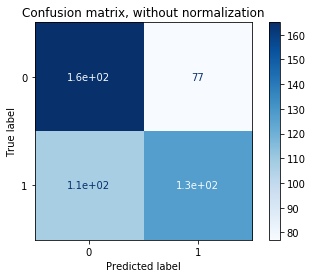

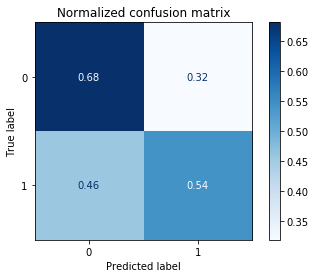

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#classifier = †(kernel='linear', C=0.01).fit(x_train, y_train)
classifier = SVC(kernel = 'linear', C=1,probability = True).fit(x_train, y_train)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [33]:
  model = SVC(gamma='scale', kernel='linear')
    model.fit(train_X, train_Y)
    test_Y = model.predict(valid_X)
    print(test_Y)
    print(valid_Y)

    all_label = list(zip(test_Y, valid_Y))
    np.save('SVM_result.npy', all_label)

    matrix = confusion_matrix(valid_Y, test_Y)
    print(matrix)

IndentationError: unexpected indent (<ipython-input-33-85d757ce5ea5>, line 2)